In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_data=df.iloc[:, 1:2].values

In [5]:
training_data.shape

(1258, 1)

## Creating the feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler()
taining_data=scaler.fit_transform(training_data)


## Creating a datastructure of 60 timestep and one output

In [8]:
X_train=[]
y_train=[]
for i in range (60,1258 ):
    X_train.append(taining_data[i-60:i, 0])
    y_train.append(taining_data[i, 0])
X_train, y_train=np.array(X_train), np.array(y_train),

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN 

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
regressor=Sequential()

In [12]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [14]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [15]:
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [16]:
## adding output layer
regressor.add(Dense(units=1))

In [17]:
## add compiler
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)
    

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0549
Epoch 2/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0060
Epoch 3/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0053
Epoch 4/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 5/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 7/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0048
Epoch 8/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 9/50
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 10/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0039
Epoch 11/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0040
Epoch 12/50
1198/1198 [============

In [19]:
# Making prdiction

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
real_stock_price 

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

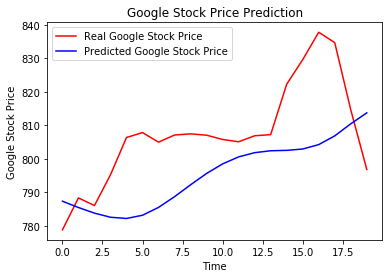

In [23]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()